In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
X=pd.concat([df['Sex'],df['Embarked']],axis=1)
X

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [10]:
df.iloc[100].values

array([101, 0, 3, 'Petranec, Miss. Matilda', 'female', 28.0, 0, 0,
       '349245', 7.8958, nan, 'S'], dtype=object)

In [14]:
df.drop(columns=['Cabin'],inplace=True)

In [42]:
X=df.iloc[:,:].values
X

array([[1, 0, 3, ..., 'A/5 21171', 7.25, 'S'],
       [2, 1, 1, ..., 'PC 17599', 71.2833, 'C'],
       [3, 1, 3, ..., 'STON/O2. 3101282', 7.925, 'S'],
       ...,
       [889, 0, 3, ..., 'W./C. 6607', 23.45, 'S'],
       [890, 1, 1, ..., '111369', 30.0, 'C'],
       [891, 0, 3, ..., '370376', 7.75, 'Q']], dtype=object)

In [16]:
import seaborn as sns

<Axes: >

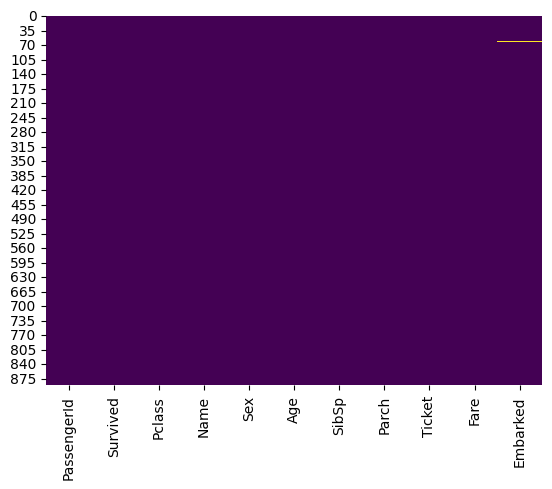

In [32]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

In [25]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df['Age']=imputer.fit_transform(df[['Age']])

In [31]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[10])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
X[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0, 3,
       'Braund, Mr. Owen Harris', 'male', 22.0, 0, 'A/5 21171', 7.25],
      dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

NameError: name 'y' is not defined